In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [18]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
path = "/content/drive/MyDrive/Python Project/"
features = pd.read_csv(path+'features.csv')
sales = pd.read_csv(path+'sales.csv')
stores = pd.read_csv(path+'stores.csv')

### Checking Null values in each file

In [20]:
sales.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [21]:
stores.isnull().sum()

Store    0
Type     0
Size     0
dtype: int64

In [22]:
features.isnull().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

### Features file is the only one with Null values, we replace the null values with  0 as missing markdown values means that there is no markdown; 
Filling the missing CPI values with mean and missing Unemployemnet values with mean of Unemployement

In [23]:
features['MarkDown1'].fillna(0, inplace=True)
features['MarkDown2'].fillna(0, inplace=True)
features['MarkDown3'].fillna(0, inplace=True)
features['MarkDown4'].fillna(0, inplace=True)
features['MarkDown5'].fillna(0, inplace=True)
features['CPI'].fillna(int(features['CPI'].mean()), inplace=True)
features['Unemployment'].fillna(int(features['Unemployment'].mean()), inplace=True)

### Merging Features and Store files to get features of each store

In [24]:
feature_store = features.merge(stores, how='inner',on="Store")

In [25]:
feature_store

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,5/2/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False,A,151315
1,1,12/2/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True,A,151315
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False,A,151315
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False,A,151315
4,1,5/3/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.000000,7.000,False,B,118221
8186,45,5/7/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.000000,7.000,False,B,118221
8187,45,12/7/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.000000,7.000,False,B,118221
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.000000,7.000,False,B,118221


In [26]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,172.000000,7.000,False
8186,45,5/7/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,172.000000,7.000,False
8187,45,12/7/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,172.000000,7.000,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,172.000000,7.000,False


### Merging Features and Sales to get features of sales

In [27]:
feature_sales = features.merge(sales, on=['Date','Store','IsHoliday'])

### Descibing and seeing the information of al the tables

In [28]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,172.427894,7.767762
std,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,38.292833,1.821454
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653774,6.833000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.000000,7.574000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [29]:
sales['Weekly_Sales']

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

In [30]:
sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [31]:
stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [32]:
feature_store.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000
mean,23.000000,59.356198,3.405992,3462.090725,1206.981664,776.464219,1392.763115,2043.403725,172.427894,7.767762,130287.600000
std,12.987966,18.678607,0.431337,7388.916286,5495.556015,7539.953758,4707.111488,9431.223215,38.292833,1.821454,63115.971429
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.000000,-185.170000,126.064000,3.684000,34875.000000
25%,12.000000,45.902500,3.041000,0.000000,0.000000,0.000000,0.000000,0.000000,132.653774,6.833000,70713.000000
50%,23.000000,60.710000,3.513000,0.000000,0.000000,0.000000,0.000000,0.000000,172.000000,7.574000,126512.000000
75%,34.000000,73.880000,3.743000,4639.585000,98.590000,24.220000,774.692500,2680.295000,212.766994,8.519000,202307.000000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000,219622.000000


In [33]:
feature_sales.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,60.090059,3.361027,2590.074819,879.974298,468.087665,1083.132268,1662.772385,171.201947,7.960289,44.260317,15981.258123
std,12.785297,18.447931,0.458515,6052.385934,5084.538801,5528.873453,3894.529945,4207.629321,39.159276,1.863296,30.492054,22711.183519
min,1.000000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,1.000000,-4988.940000
25%,11.000000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,18.000000,2079.650000
50%,22.000000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,37.000000,7612.030000
75%,33.000000,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,74.000000,20205.852500
max,45.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,99.000000,693099.360000


### Checking weekly sales of each store

In [34]:
sales.groupby('Store').describe()

Dept                        ... Weekly_Sales                       
         count       mean        std  ...          50%         75%        max
Store                                 ...                                    
1      10244.0  44.391742  29.867247  ...    10289.375  31452.9575  203670.47
2      10238.0  44.483786  29.987498  ...    14333.530  34697.3775  285353.53
3       9036.0  41.038623  29.188272  ...     2804.815   7158.2950  155897.94
4      10272.0  44.522975  29.968940  ...    15116.810  40686.6525  385051.04
5       8999.0  41.285254  29.083196  ...     2582.660   6359.4450   93517.72
6      10211.0  44.443443  30.007975  ...    13637.840  32601.9050  342578.65
7       9762.0  44.343167  30.194595  ...     4575.240  11676.0350  222921.09
8       9895.0  43.680344  29.844571  ...     7164.160  19082.3200  153431.69
9       8867.0  40.069020  28.565666  ...     4205.470  11633.4800  139427.43
10     10315.0  44.033931  29.349578  ...    13941.430  38970.7200  693099.36
11     10062.0  44.564003  30.213862  ...    12322.110  27110.7250  245767.47
12      9705.0  43.462030  29.846630  ...     8141.620  20478.9400  360140.66
13     10474.0  44.624021  29.674113  ...    14018.455  36374.9775  292165.78
14     10040.0  44.029183  29.726228  ...    15208.805  36073.0000  474330.10
15      9901.0  44.024442  29.999145  ...     4798.870  11927.3400  292555.25
16      9443.0  42.655936  29.730358  ...     4134.910  10322.2900  129372.97
17      9864.0  43.590126  29.562856  ...     6758.145  17007.9900  194660.52
18      9859.0  43.492849  29.621951  ...     9282.020  20782.8750  353008.64
19     10148.0  44.921561  29.998061  ...    12410.055  25480.6800  339846.03
20     10214.0  44.097611  29.444961  ...    16249.780  39377.6925  422306.25
21      9582.0  43.003131  29.653980  ...     6703.750  15985.5525  244640.55
22      9688.0  43.639657  29.844577  ...     8270.225  19952.7850  393705.20
23     10050.0  43.952239  29.706702  ...    11993.015  29796.1525  369830.98
24     10228.0  44.461967  30.006906  ...    10532.430  25848.2575  233371.62
25      9804.0  43.570175  29.506431  ...     5539.170  12581.3875  198719.71
26      9854.0  44.277654  30.463879  ...     7083.465  18271.9275  196615.87
27     10225.0  44.467971  30.033953  ...    13625.950  34441.3200  420586.57
28     10113.0  44.464748  30.174731  ...    10941.930  24601.1900  355356.39
29      9455.0  43.182232  29.903998  ...     4712.540  10464.7600  266480.63
30      7156.0  47.059251  34.129660  ...     1047.950  12148.2150   80457.01
31     10142.0  44.551075  30.233990  ...     8511.325  24566.1075  274558.07
32     10202.0  44.500196  30.049723  ...     7584.315  19859.4325  220379.93
33      6487.0  46.674888  34.658947  ...      912.810   7654.6750   49129.77
34     10224.0  44.745892  29.985832  ...     6680.565  18208.5075  161262.15
35      9528.0  43.504408  29.753587  ...     9211.620  18664.9050  649770.18
36      6222.0  47.166988  34.985853  ...     1903.285  12341.5300   78974.83
37      7206.0  46.892867  34.082476  ...     1722.900  15616.4275   99514.86
38      7362.0  46.247080  33.839311  ...      751.255  10152.9000  100618.04
39      9878.0  44.730006  30.398542  ...    11016.425  28591.5675  351553.98
40     10017.0  44.760307  30.131271  ...     6989.990  18604.6300  145504.24
41     10088.0  44.828410  30.140423  ...     8927.475  22995.4975  290809.17
42      6953.0  47.018553  34.063094  ...     1293.800  15706.4700  112152.35
43      6751.0  47.096726  34.458159  ...     1732.530  18428.6300  108517.42
44      7169.0  46.740271  34.156804  ...      799.530   6846.2600   66629.98
45      9637.0  43.388918  29.941132  ...     6019.300  15076.5100  240758.86

[45 rows x 16 columns]

### Checking the number of rows of each  department in each row in sales

In [35]:
sales.groupby(['Dept','Store']).size()

Dept  Store
1     1        143
      2        143
      3        143
      4        143
      5        143
              ... 
99    39        41
      40        36
      41        43
      43         4
      44         2
Length: 3331, dtype: int64

### Exploratory Analysis

In [36]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [37]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [38]:
def plotCorrelationMatrix(df, graphWidth):
    filename = df
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

### Seeing the correlation Matrix of the each dataset

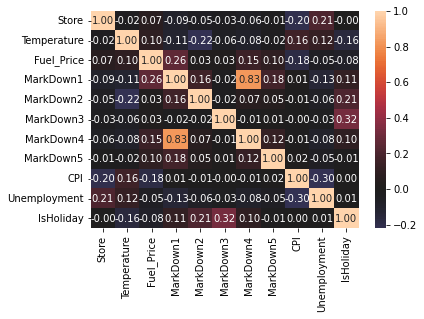

In [39]:
sns.heatmap(features.corr(), robust=True, center=0, annot = True, fmt=".2f")

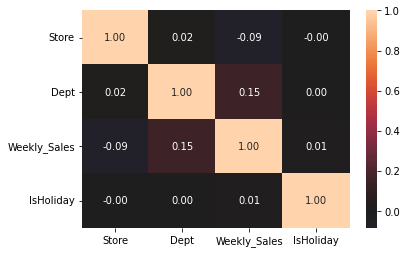

In [40]:
sns.heatmap(sales.corr(), robust=True, center=0, annot = True, fmt=".2f")

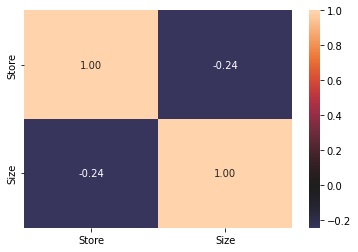

In [41]:
sns.heatmap(stores.corr(), robust=True, center=0, annot = True, fmt=".2f")

### Correlation scatter plot matrix of each file

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


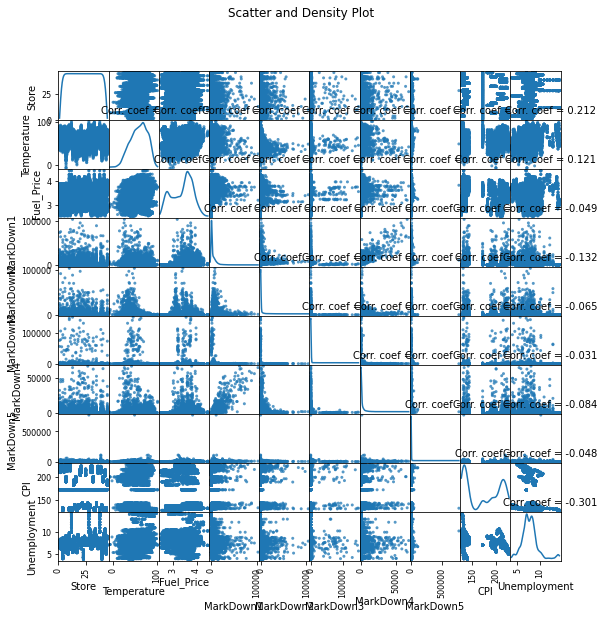

In [42]:
plotScatterMatrix(features, 9, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


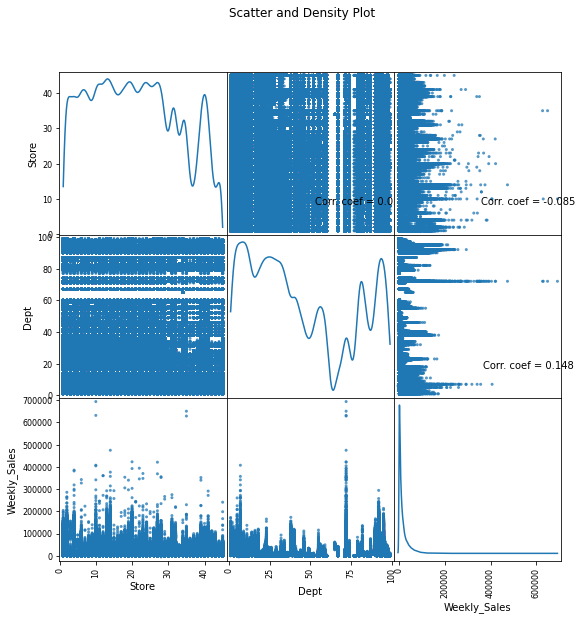

In [43]:
plotScatterMatrix(sales, 9, 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  """


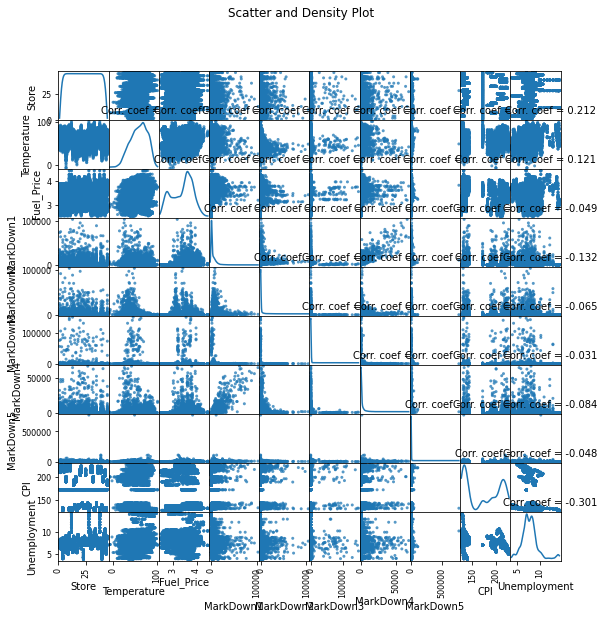

In [44]:
plotScatterMatrix(feature_store, 9, 10)

### Plotting to see yearly sales

In [45]:
feature_sales['Date'] = pd.to_datetime(feature_sales['Date'])
feature_sales['Year'] = pd.to_datetime(feature_sales['Date']).dt.year
feature_sales['Month'] = pd.to_datetime(feature_sales['Date']).dt.month
feature_sales['Week'] = pd.to_datetime(feature_sales['Date']).dt.week
feature_sales['Day'] = pd.to_datetime(feature_sales['Date']).dt.day
feature_sales.replace({'A': 1, 'B': 2,'C':3},inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


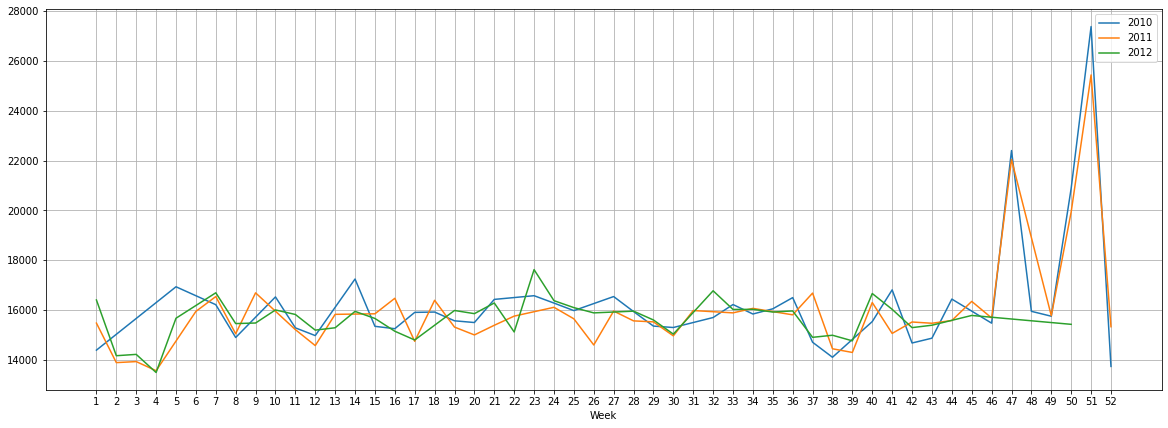

In [46]:
weekly_sales = feature_sales.groupby(['Year','Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2010 = feature_sales.loc[feature_sales['Year']==2010].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2011 = feature_sales.loc[feature_sales['Year']==2011].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
weekly_sales2012 = feature_sales.loc[feature_sales['Year']==2012].groupby(['Week']).agg({'Weekly_Sales': ['mean', 'median']})
plt.figure(figsize=(20, 7))
sns.lineplot(weekly_sales2010['Weekly_Sales']['mean'].index, weekly_sales2010['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2011['Weekly_Sales']['mean'].index, weekly_sales2011['Weekly_Sales']['mean'].values)
sns.lineplot(weekly_sales2012['Weekly_Sales']['mean'].index, weekly_sales2012['Weekly_Sales']['mean'].values)

plt.grid()
plt.xticks(np.arange(1, 53, step=1))
plt.legend(['2010', '2011', '2012'])
plt.show()


### Detecting Outliers using BoxPlot

Text(0.5, 0, 'Weekly_Sales')

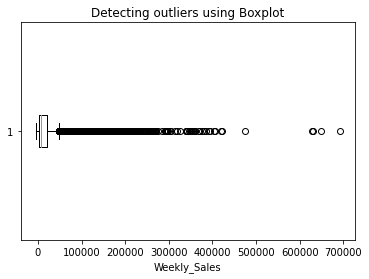

In [47]:
plt.boxplot(sales['Weekly_Sales'], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Weekly_Sales')

### Correlation Matrix of Features Sales

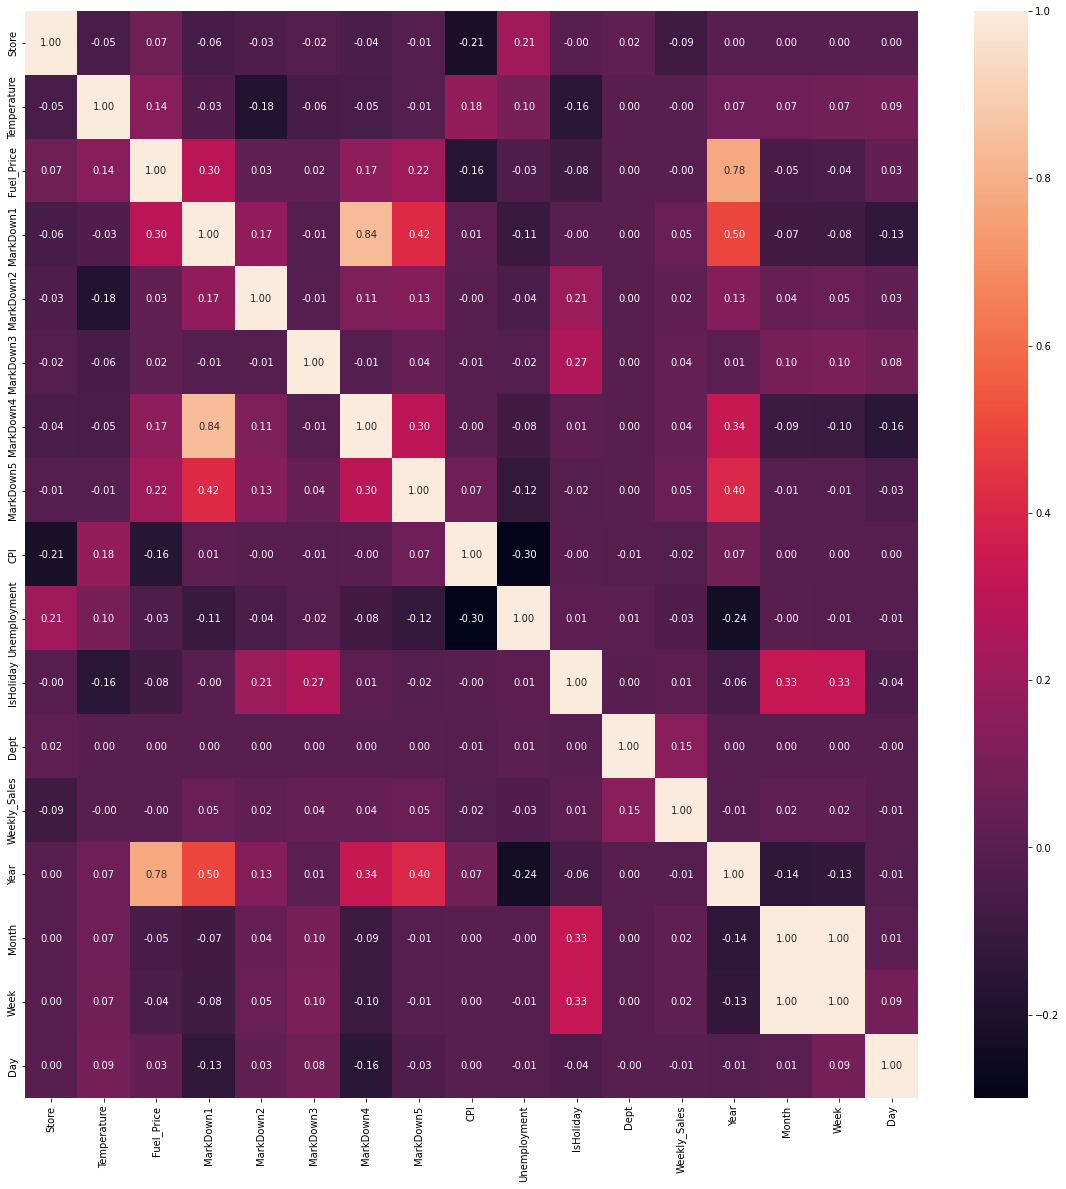

In [48]:
import seaborn as sns
data_corr = feature_sales.corr()

plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True,fmt=".2f")

### Preparing the data for model building and prediction

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
numeric_cols = feature_sales.select_dtypes(include=np.number).columns.tolist()
categorical_cols = feature_sales.select_dtypes('object').columns.tolist()

In [51]:
sales_num = feature_sales[numeric_cols]

In [52]:
sales_num

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Year,Month,Week,Day
0,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,1,24924.50,2010,5,17,2
1,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,2,50605.27,2010,5,17,2
2,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,3,13740.12,2010,5,17,2
3,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,4,39954.04,2010,5,17,2
4,1,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,5,32229.38,2010,5,17,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,93,2487.80,2012,10,43,26
421566,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,94,5203.31,2012,10,43,26
421567,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,95,56017.47,2012,10,43,26
421568,45,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,97,6817.48,2012,10,43,26


**Dropping Fuels Price column as it has high correlation with weekly sales and Markdown 4 as it has high correlation with Markdown 1**

In [53]:
sales_num=sales_num.drop(["Fuel_Price","MarkDown4"],axis=1)

### Splitting the Data ainto train, test, split

In [54]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    sales_num.drop(['Weekly_Sales'],axis='columns'), sales["Weekly_Sales"], test_size=0.2,random_state=1, shuffle=True)


### Sclaing the data to normalize

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

### Performing Linear Regression to predict Weekly sales

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [58]:
Y_pred=lr.predict(X_train)
Y_pred

array([14097.34596797,   271.25090328, 24449.09432838, ...,
       19591.57629938, 10723.51183529, 23495.97588657])

In [59]:
Y_pred_test=lr.predict(X_test)
Y_pred_test

array([ -674.07949333, 15749.65867835, 16177.97718515, ...,
       14698.54694894, 25468.22285416, 27508.86556427])

In [60]:
from sklearn.metrics import mean_squared_error

mean_squared_error(Y_pred,y_train,squared=False)


21455.55038007843

In [61]:
mean_squared_error(Y_pred_test,y_test,squared=False)

21483.719128492008

In [62]:
lr.score(X_train,y_train)

0.10672047220613279

### Random Forest Regressor to predict Weekly Sales

In [63]:
from sklearn.ensemble import RandomForestRegressor
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(X_train, y_train)
    train_rmse = mean_squared_error(model.predict(X_train), y_train, squared=False)
    val_rmse = mean_squared_error(model.predict(X_test), y_test, squared=False)
    return train_rmse, val_rmse

In [64]:
test_params(n_estimators=20, max_depth=20)

(3902.430157907502, 6560.498943973233)

In [65]:
import matplotlib.pyplot as plt
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

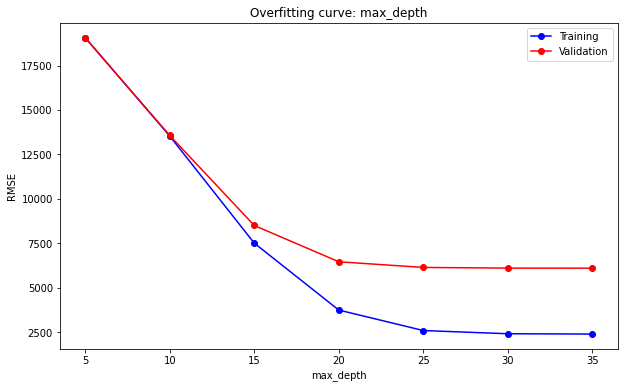

In [66]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

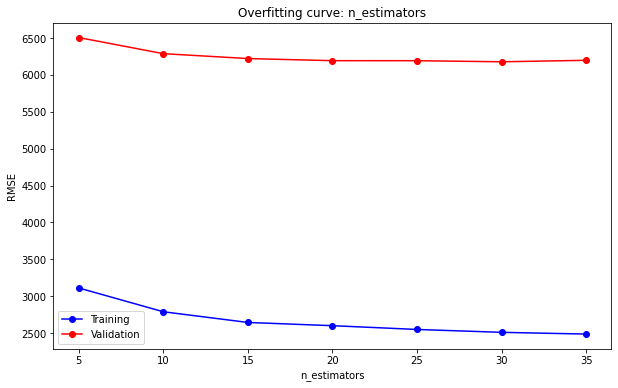

In [67]:
test_param_and_plot('n_estimators', [5, 10, 15, 20, 25, 30, 35])

In [68]:
RF = RandomForestRegressor(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
RF.fit(X_train,y_train)

RandomForestRegressor(max_depth=27, max_features=6, min_samples_split=3,
                      n_estimators=58)

In [69]:
y_pred=RF.predict(X_test)

In [70]:
mean_squared_error(y_pred,y_test,squared=False)

5941.757732764229

In [71]:
RF.score(X_train,y_train)

0.9837078722715878

In [72]:
RF.score(X_test,y_test)

0.9317959136014347

## Converting the sales to categories of low, medium and high and predicting the category of sales

In [73]:
new_sales = feature_sales.drop("Date",axis=1)

In [74]:
new_sales=new_sales.groupby(['Month','Year','Store']).agg({'Weekly_Sales':'sum', 'MarkDown1':'sum', 'MarkDown2':'sum', 'MarkDown3':'sum', 'MarkDown4':'sum', 'MarkDown5':'sum','IsHoliday':'sum','CPI':'mean','Unemployment':'mean','Fuel_Price':'mean','Temperature':'mean'}).reset_index()
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,111486.33,0.0,1868.01,59270.80,1023899.52,0,199.053937,6.195,3.760,39.38
1616,12,2012,42,612379.90,2469.00,0.0,543.50,0.00,48536.00,0,131.108333,6.943,4.468,76.03
1617,12,2012,43,619369.72,4325.28,0.0,698.88,0.00,43754.40,0,214.677283,8.839,3.601,71.14
1618,12,2012,44,337796.13,3777.84,0.0,164.70,0.00,53979.48,0,131.108333,5.217,3.797,55.10


In [75]:
for index,rows in new_sales.iterrows():
    hol=rows.get("IsHoliday")
    if hol>0:
        new_sales.loc[index,"IsHoliday"]=1
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,111486.33,0.0,1868.01,59270.80,1023899.52,0,199.053937,6.195,3.760,39.38
1616,12,2012,42,612379.90,2469.00,0.0,543.50,0.00,48536.00,0,131.108333,6.943,4.468,76.03
1617,12,2012,43,619369.72,4325.28,0.0,698.88,0.00,43754.40,0,214.677283,8.839,3.601,71.14
1618,12,2012,44,337796.13,3777.84,0.0,164.70,0.00,53979.48,0,131.108333,5.217,3.797,55.10


In [76]:
new_sales['Sales category'] = pd.qcut(new_sales['Weekly_Sales'], q=3,labels=["low", "medium", "high"])
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature,Sales category
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89,low
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24,low
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60,low
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96,low
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,111486.33,0.0,1868.01,59270.80,1023899.52,0,199.053937,6.195,3.760,39.38,low
1616,12,2012,42,612379.90,2469.00,0.0,543.50,0.00,48536.00,0,131.108333,6.943,4.468,76.03,low
1617,12,2012,43,619369.72,4325.28,0.0,698.88,0.00,43754.40,0,214.677283,8.839,3.601,71.14,low
1618,12,2012,44,337796.13,3777.84,0.0,164.70,0.00,53979.48,0,131.108333,5.217,3.797,55.10,low


In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [78]:
new_sales

,Month,Year,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature,Sales category
0,1,2010,1,1453329.50,0.00,0.0,0.00,0.00,0.00,0,211.671989,7.838,2.603,71.89,low
1,1,2010,2,1827440.43,0.00,0.0,0.00,0.00,0.00,0,211.329874,8.163,2.603,69.24,low
2,1,2010,3,358784.10,0.00,0.0,0.00,0.00,0.00,0,214.984655,7.564,2.603,73.60,low
3,1,2010,4,1842821.02,0.00,0.0,0.00,0.00,0.00,0,126.234600,7.127,2.619,63.96,low
4,1,2010,5,283178.12,0.00,0.0,0.00,0.00,0.00,0,212.226946,6.768,2.603,71.10,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1615,12,2012,41,1409544.97,111486.33,0.0,1868.01,59270.80,1023899.52,0,199.053937,6.195,3.760,39.38,low
1616,12,2012,42,612379.90,2469.00,0.0,543.50,0.00,48536.00,0,131.108333,6.943,4.468,76.03,low
1617,12,2012,43,619369.72,4325.28,0.0,698.88,0.00,43754.40,0,214.677283,8.839,3.601,71.14,low
1618,12,2012,44,337796.13,3777.84,0.0,164.70,0.00,53979.48,0,131.108333,5.217,3.797,55.10,low


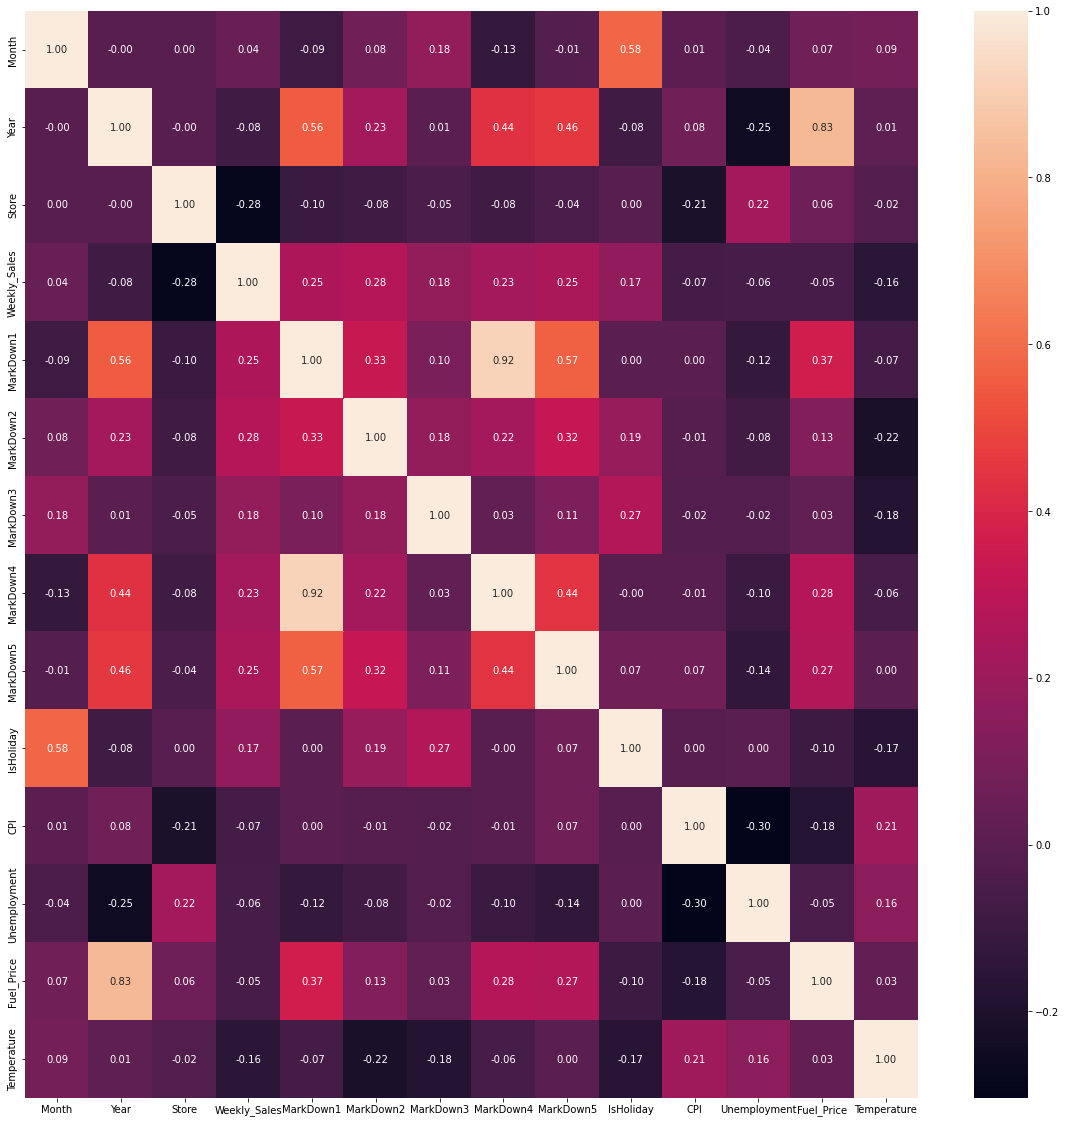

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

data_corr = new_sales.corr()

plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True,fmt=".2f")

In [80]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    new_sales.drop(['Weekly_Sales','Year','Sales category'],axis='columns'), new_sales["Sales category"], test_size=0.2,random_state=1, shuffle=True)


In [81]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [83]:
y_pred = model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score
ac = accuracy_score(y_test,y_pred)
ac

0.7469135802469136

In [85]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  2, 16],
       [ 4, 90, 22],
       [24, 14, 62]])

In [86]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=58, max_depth=27, max_features=6, min_samples_split=3, min_samples_leaf=1)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=27, max_features=6, min_samples_split=3,
                       n_estimators=58)

In [87]:
y_pred=model.predict(X_test)

In [88]:
ac = accuracy_score(y_test,y_pred)
ac

0.7993827160493827

In [89]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[90,  2, 16],
       [ 2, 99, 15],
       [16, 14, 70]])

In [90]:
import xgboost as xgb
xgb_c1=xgb.XGBClassifier()
print(type(xgb_c1))

<class 'xgboost.sklearn.XGBClassifier'>


In [91]:
xgb_c1.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [92]:
y_pred = xgb_c1.predict(X_test)

In [93]:
ac = accuracy_score(y_test,y_pred)
ac

0.7901234567901234

In [94]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[91,  2, 15],
       [ 2, 94, 20],
       [18, 11, 71]])

## 

### Predicting weekly sales department wise

In [95]:
feature_sales = features.merge(sales, how='inner',on=["Store","Date"])

In [96]:
feature_sales

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y
0,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50,False
1,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27,False
2,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12,False
3,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04,False
4,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80,False
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31,False
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47,False
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48,False


In [97]:
feature_sales=feature_sales.drop('IsHoliday_y',axis='columns')
feature_sales=feature_sales.rename(columns={'IsHoliday_x':'IsHoliday'})
feature_sales

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales
0,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,1,24924.50
1,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,2,50605.27
2,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,3,13740.12
3,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,4,39954.04
4,1,5/2/2010,42.31,2.572,0.00,0.00,0.0,0.00,0.00,211.096358,8.106,False,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,93,2487.80
421566,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,94,5203.31
421567,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,95,56017.47
421568,45,26/10/2012,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,97,6817.48


In [98]:
sales = feature_sales.groupby(['Dept','Date']).agg({'Weekly_Sales':'sum', 'MarkDown1':'sum', 'MarkDown2':'sum', 'MarkDown3':'sum', 'MarkDown4':'sum', 'MarkDown5':'sum','IsHoliday':'sum','CPI':'mean','Unemployment':'mean','Fuel_Price':'mean','Temperature':'mean'}).reset_index()

In [99]:
for index,rows in sales.iterrows():
    hol=rows.get("IsHoliday")
    if hol>0:
        sales.loc[index,"IsHoliday"]=1
sales

,Dept,Date,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature
0,1,1/10/2010,764160.42,0.00,0.00,0.00,0.00,0.00,0,168.354706,8.475289,2.734333,69.868000
1,1,1/4/2011,781166.10,0.00,0.00,0.00,0.00,0.00,0,170.725418,8.150133,3.602356,48.736444
2,1,1/6/2012,628090.49,311761.38,835.60,4599.16,69900.38,135953.33,0,175.603188,7.419533,3.750822,72.943778
3,1,1/7/2011,645093.80,0.00,0.00,0.00,0.00,0.00,0,171.395827,8.097489,3.675978,78.759111
4,1,10/12/2010,1287990.47,0.00,0.00,0.00,0.00,0.00,0,168.412614,8.475289,2.976378,39.165111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11085,99,9/12/2011,17463.53,118015.17,698.87,8467.49,60153.40,234976.41,0,176.870408,7.601450,3.335500,37.263500
11086,99,9/3/2012,320.01,122285.87,6935.76,48.60,53868.71,67656.75,0,176.570582,7.355750,3.805500,46.974167
11087,99,9/4/2010,0.01,0.00,0.00,0.00,0.00,0.00,0,135.785636,8.058000,2.992000,62.620000
11088,99,9/7/2010,10.28,0.00,0.00,0.00,0.00,0.00,0,168.458766,8.957500,2.639500,78.335000


In [100]:
sales = sales.drop(['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5'],axis=1)

In [101]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales['Year'] = pd.to_datetime(sales['Date']).dt.year
sales['Month'] = pd.to_datetime(sales['Date']).dt.month
sales['Week'] = pd.to_datetime(sales['Date']).dt.week
sales['Day'] = pd.to_datetime(sales['Date']).dt.day
sales.replace({'A': 1, 'B': 2,'C':3},inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [102]:
sales

,Dept,Date,Weekly_Sales,IsHoliday,CPI,Unemployment,Fuel_Price,Temperature,Year,Month,Week,Day
0,1,2010-01-10,764160.42,0,168.354706,8.475289,2.734333,69.868000,2010,1,1,10
1,1,2011-01-04,781166.10,0,170.725418,8.150133,3.602356,48.736444,2011,1,1,4
2,1,2012-01-06,628090.49,0,175.603188,7.419533,3.750822,72.943778,2012,1,1,6
3,1,2011-01-07,645093.80,0,171.395827,8.097489,3.675978,78.759111,2011,1,1,7
4,1,2010-10-12,1287990.47,0,168.412614,8.475289,2.976378,39.165111,2010,10,41,12
...,...,...,...,...,...,...,...,...,...,...,...,...
11085,99,2011-09-12,17463.53,0,176.870408,7.601450,3.335500,37.263500,2011,9,37,12
11086,99,2012-09-03,320.01,0,176.570582,7.355750,3.805500,46.974167,2012,9,36,3
11087,99,2010-09-04,0.01,0,135.785636,8.058000,2.992000,62.620000,2010,9,35,4
11088,99,2010-09-07,10.28,0,168.458766,8.957500,2.639500,78.335000,2010,9,36,7


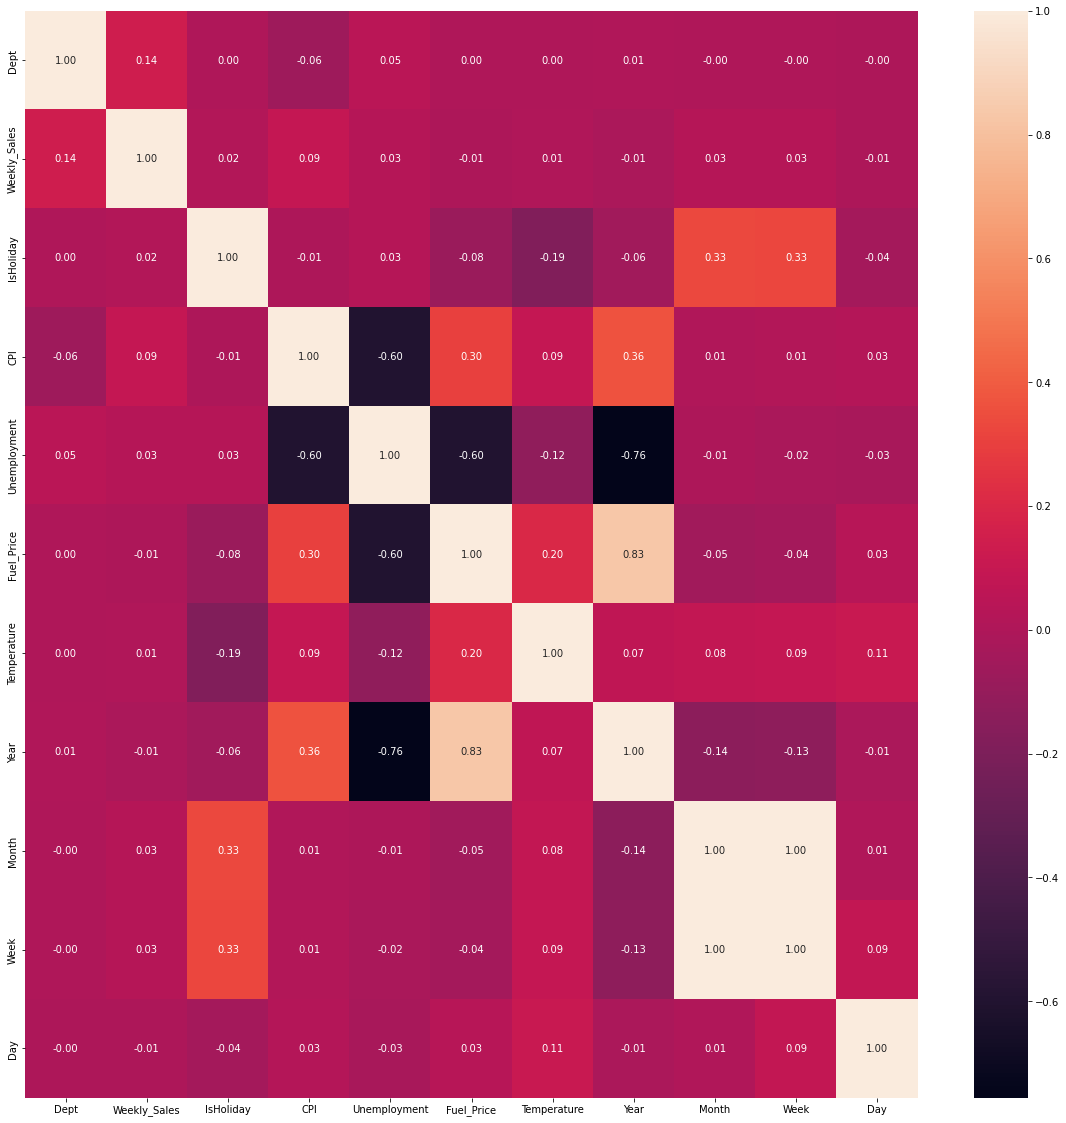

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

sales_corr = sales.corr()

plt.figure(figsize=(20,20))
sns.heatmap(sales_corr,annot=True,fmt=".2f")

In [104]:
sales = sales.drop(['Date'],axis=1)

In [105]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(
    sales.drop(['Weekly_Sales'],axis='columns'), sales["Weekly_Sales"], test_size=0.2,random_state=1, shuffle=True)

In [106]:
from sklearn.preprocessing import MinMaxScaler
scaler1 = MinMaxScaler()
X_train = scaler1.fit_transform(X_train)
X_test = scaler1.transform(X_test)

In [107]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import cross_val_score
rt = DecisionTreeRegressor()
rt.fit(X_train, y_train)
scores = cross_val_score(rt, X_train, y_train, scoring='r2', cv=3)
print("r2 scores from cross-validation: " + str(scores))

r2 scores from cross-validation: [0.92147902 0.89847203 0.92344958]


In [108]:
import sklearn
y_pred = rt.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("r2 score of model:" + str(r2))

r2 score of model:0.9390915882710188


In [109]:
from sklearn.linear_model import LinearRegression
rl=LinearRegression()
rl.fit(X_train,y_train)
scores = cross_val_score(rl, X_train, y_train, scoring='r2', cv=3)
print("r2 scores from cross-validation: " + str(scores))

r2 scores from cross-validation: [0.04188836 0.04204124 0.03980597]


In [110]:
y_pred = rl.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("r2 score of model:" + str(r2))

r2 score of model:0.04903119903079545


In [111]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=30, max_depth=20)
rf.fit(X_train,y_train)
scores = cross_val_score(rf, X_train, y_train, scoring='r2', cv=3)
print("r2 scores from cross-validation: " + str(scores))

r2 scores from cross-validation: [0.94961805 0.95404701 0.92678101]


In [112]:
y_pred = rf.predict(X_test)
r2 = sklearn.metrics.r2_score(y_test, y_pred)
print("r2 score of model:" + str(r2))

r2 score of model:0.9426232802302136
